In [2]:
from common.config import Config_IKP
import pandas as pd


robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

config = Config_IKP()
num_poses = 50
num_sols = 250
df_file_path = lambda robot_name: f"{config.record_dir}/iter_time_{robot_name}_{num_poses}_{num_sols}.csv"

In [1]:
# concat all dataframes into one dataframe
# where new column is robot name
def concatenate_all_dfs(robot_names: list, file_path_function):
    df_list = []
    for robot_name in robot_names:
        df_temp = pd.read_csv(file_path_function(robot_name), index_col=0)
        df_temp["robot_name"] = robot_name
        df_temp.reset_index(drop=True, inplace=True)  # Reset the index
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames
    # robot name is the first column
    df = df[["robot_name"] + [col for col in df.columns if col != "robot_name"]]
    # all number round to 2 decimal places
    df = df.round(2)
    return df
# save to csv
# df = concatenate_all_dfs(robot_names, df_file_path)
# df.to_csv(f"{config.record_dir}/iter_time_all_{num_poses}_{num_sols}.csv")
# df

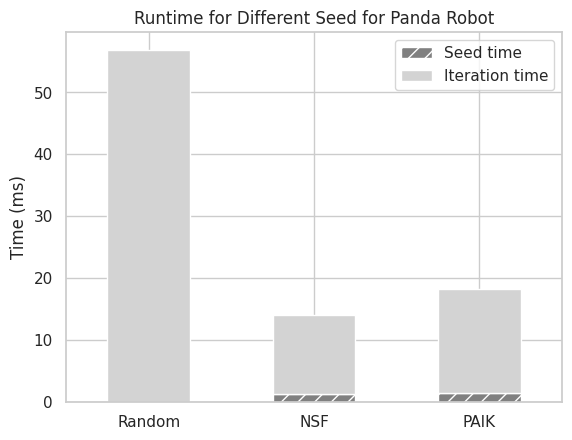

In [47]:
# the run_time is a combination of the seed time and the iteration time
# plot the run_time bar diagram with different color for seed time and iteration time for panda robot
# grab the information from df
import matplotlib.pyplot as plt
import seaborn as sns

df_panda = df[df["robot_name"] == "panda"]
df_panda = df_panda[["solver", "seed_time", "iteration_time"]]
df_panda = df_panda.round(2)

# Rename the solvers
df_panda['solver'] = df_panda['solver'].replace({
    'random': 'Random',
    'nsf': 'NSF',
    'paik': 'PAIK'
})

# plot the stacked bar diagram
# x_axis is the solver
# y_axis is the run_time
# the bar is stacked with seed_time and iteration_time

ax = df_panda.set_index("solver").plot(kind="bar", stacked=True, color=["gray", "#d3d3d3"])

# Add hatching to the seed_time bars
bars = ax.patches
hatch_pattern = '//'

for bar in bars[:len(df_panda)]:  # Apply hatch only to the seed_time bars
    bar.set_hatch(hatch_pattern)

# Set x-axis labels and rotation
ax.set_xticklabels(['Random', 'NSF', 'PAIK'], rotation=0)

# Remove the x-axis label
ax.set_xlabel('')

# Change the legend labels
ax.legend(labels=['Seed time', 'Iteration time'])

plt.ylabel("Time (ms)")
plt.title("Runtime for Different Seed for Panda Robot")

# Save the plot
plt.savefig(f"{config.record_dir}/runtime_panda_{num_poses}_{num_sols}.png")
plt.show()

In [3]:
# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_17"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.1, 0.25]

robot_names = ["panda"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["num", "ikflow", "nsf", "paik"]

df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

df_dict = {}

for std in stds:
    df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, "panda", num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

# df = concatenate_all_dfs(robot_names, df_file_path)

# Reorder columns to swap mmd and solve_time_ms
# df = df[['robot_name', 'solver', 'mmd', 'l2_mm', 'ang_deg', 'solve_time_ms']]

# df.to_csv(f"{config.record_dir}/ikp_all_{config.num_poses}_{config.num_sols}_{config.std}.csv")
# df

In [4]:
for std in stds:
    # use df_std to store the mean of each solver
    df_std = pd.DataFrame()
    # df_std only contains the mean of each solver
    for solver_name in solver_names:
        df_std[solver_name] = df_dict[std][solver_name].mean()
    print(f"std: {std}")
    print(df_std)    
    
    # print out the mean of each df

std: 0.01
                      num     ikflow         nsf       paik
l2_mm            0.422474   3.939589    2.832101   3.147491
ang_deg          0.051696   1.547974    1.650251   1.502569
solve_time_ms  534.945000  43.443000  103.399000  97.284000
#rep            21.560000   3.094000    2.894000   6.176000
mmd_guassian     0.000000   0.827902    0.826284   0.208942
mmd_imq          0.000000   0.614109    0.608374   0.157271
std: 0.1
                      num     ikflow         nsf       paik
l2_mm            0.422956   3.991571    2.956236   3.193487
ang_deg          0.051702   1.567172    1.693106   1.508217
solve_time_ms  532.155000  43.244000  102.294000  96.521000
#rep            21.701000  22.509000   25.354000  22.973000
mmd_guassian     0.000000   0.498353    0.406987   0.183183
mmd_imq          0.000000   0.370641    0.294698   0.137329
std: 0.25
                      num     ikflow         nsf       paik
l2_mm            0.422542   4.196004    3.210284   3.326665
ang_deg    

In [7]:
# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]	

df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

df_dict = {}

for std in stds:
    df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, "panda", num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

for std in stds:
    # use df_std to store the mean of each solver
    df_std = pd.DataFrame()
    # df_std only contains the mean of each solver
    for solver_name in solver_names:
        df_std[solver_name] = df_dict[std][solver_name].mean()
    print(f"std: {std}")
    print(df_std)

std: 0.01
                      num     ikflow  nsf_diag_normal  paik_diag_normal  \
l2_mm            0.422478   3.951169         2.834251          3.167740   
ang_deg          0.051694   1.550240         1.652374          1.536238   
solve_time_ms  532.725000  40.732000        99.293000         97.123000   
#rep            21.626000   3.056000         2.949000          8.960000   
mmd_guassian     0.000000   0.827144         0.825658          0.155587   
mmd_imq          0.000000   0.613562         0.607862          0.115618   

               nsf_box_uniform  paik_box_uniform  
l2_mm                 2.872495          3.159702  
ang_deg               1.669509          1.539588  
solve_time_ms       101.398000         98.967000  
#rep                  1.631000          8.332000  
mmd_guassian          0.845563          0.156958  
mmd_imq               0.624282          0.116690  
std: 0.05
                      num     ikflow  nsf_diag_normal  paik_diag_normal  \
l2_mm            0.422

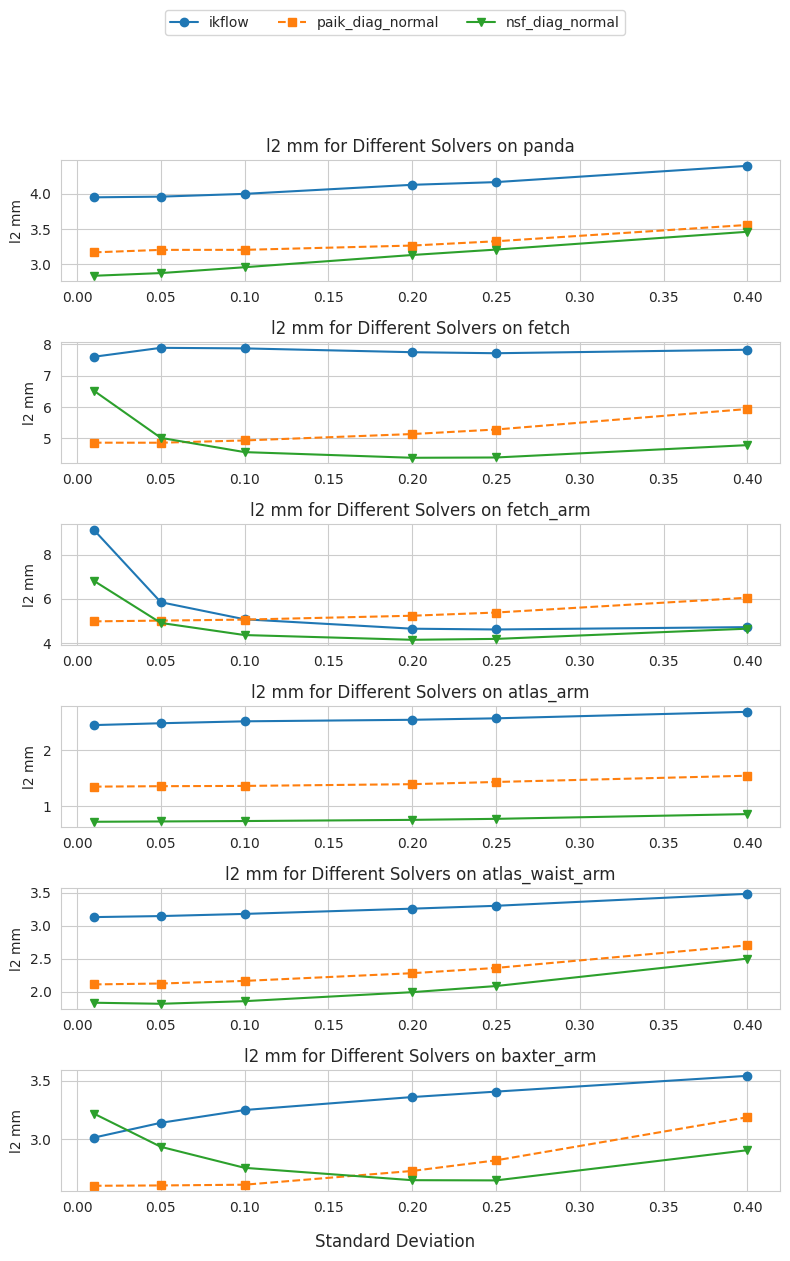

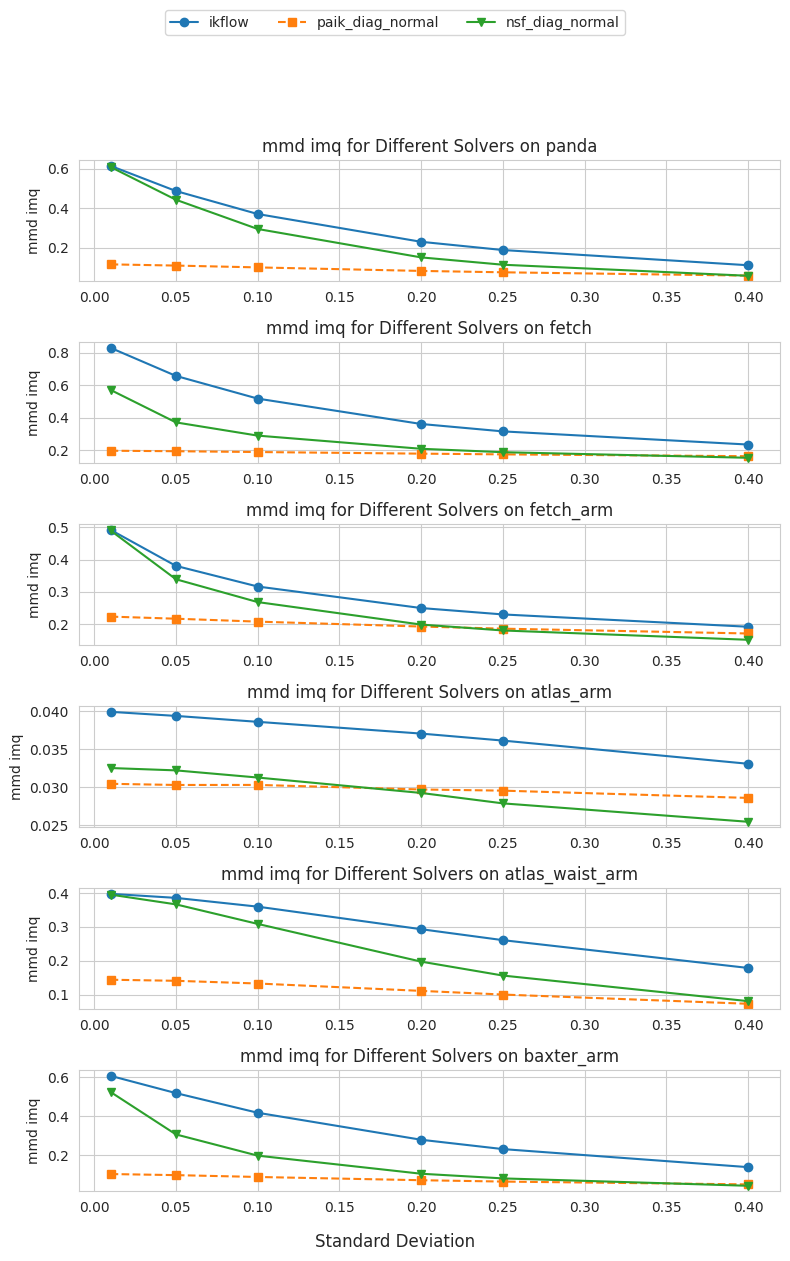

In [22]:
# draw the line plot for each robot
# x-axis is the std
# y-axis is the l2_mm
# each line is a different solver
# the line is colored by the solver
# the line is solid if it is a box_uniform solver
# the line is dashed if it is a diag_normal solver

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["ikflow", "paik_diag_normal", "nsf_diag_normal"]	# ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]	

def line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, metric_name):
    # Set the style
    sns.set_style("whitegrid")

    # Set the palette
    palette = sns.color_palette("tab10")

    # Set the markers
    markers = ['o', 's', 'v', 'D', 'X', 'P']

    # Set the linestyles
    linestyles = ['-', '--', '-', '--', '-', '--']

    # Set the x-axis label
    xlabel = 'Standard Deviation'

    # Set the y-axis label
    ylabel = metric_name.replace("_", " ")

    # Set the figure size
    figsize = (8, 12)

    # Create the figure and the axes each row contains 2 plots with total num_solvers plots 
    fig, axs = plt.subplots(len(robot_names), figsize=figsize)

    # Flatten the axes
    axs = axs.flatten()

    legend_labels = {}

    for i, robot_name in enumerate(robot_names):

        df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

        df_dict = {}

        for std in stds:
            df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, robot_name, num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

        # Set the title
        title = f'{ylabel} for Different Solvers on {robot_name}'

        ax = axs[i]

        # each line is a different solver
        # the line is colored by the solver
        
        for i, solver_name in enumerate(solver_names):
            x = np.array(stds)
            y = np.array([df_dict[std][solver_name][metric_name].mean() for std in stds])
            yerr = np.array([df_dict[std][solver_name][metric_name].std() for std in stds])

            # Plot the data
            line, = ax.plot(x, y, label=solver_name, color=palette[i], marker=markers[i], linestyle=linestyles[i])
            
            # # Add shaded area
            # ax.fill_between(x, y - yerr, y + yerr, color=palette[i], alpha=0.2)

            if solver_name not in legend_labels:
                legend_labels[solver_name] = line

        # Set the title
        ax.set_title(title)
        
        # Set the y-axis label
        ax.set_ylabel(ylabel)
        
    fig.legend(list(legend_labels.values()), list(legend_labels.keys()), loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    
    fig.supxlabel(xlabel)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Show the plot
    plt.show()
    
line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, "l2_mm")
line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, "mmd_imq")

In [45]:
# draw the line plot for each robot
# x-axis is the std
# y-axis is the l2_mm
# each line is a different solver
# save the mean of the l2_mm for each solver in a dataframe
# save the mean of the mmd_imq for each solver in a dataframe

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["ikflow", "paik_diag_normal", "nsf_diag_normal"]	# ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]

def concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name):
    df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

    records = []
    for std in stds:
        df = pd.read_csv(df_file_path(config.record_dir, robot_name, num_poses, num_sols, std, solver_name), index_col=0)
        mean_values = df.mean().to_dict()
        mean_values.update({"std": std, "robot_name": robot_name, "solver": solver_name})
        records.append(mean_values)
    
    df_stds = pd.DataFrame(records)
    return df_stds

def concatenate_df_mean_for_all_robots(robot_names: list, num_poses, num_sols, stds, solver_names):
    df_list = []
    for robot_name in robot_names:
        for solver_name in solver_names:
            df_temp = concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name)
            df_list.append(df_temp)
    df = pd.concat(df_list, ignore_index=True)
    return df
        
robot_name = robot_names[0]
solver_name = solver_names[0]
# df_stds = concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name)
df_all = concatenate_df_mean_for_all_robots(robot_names, num_poses, num_sols, stds, solver_names)

In [47]:
df_all.to_csv(f"{config.record_dir}/ikp_all_robot_solver_stds_{num_poses}_{num_sols}.csv")

In [65]:
import os

# filter the dataframe to only contain the l2_mm and mmd_imq
df = df_all[["robot_name", "solver", "l2_mm", "mmd_imq", "std"]]

def filter_robot(df, robot_name):
    dirctory = f"{config.record_dir}/filtered_robot"
    if not os.path.exists(dirctory):
        os.makedirs(dirctory)
    
    df_robot = df[df["robot_name"] == robot_name]
    # filter std == 0.01, 0.10, 0.25
    df_robot = df_robot[df_robot["std"].isin([0.01, 0.10, 0.25])]
    # remove robot_name column
    df_robot = df_robot.drop(columns=["robot_name"])
    # round to 2 decimal places
    df_robot = df_robot.round(2)
    # solver_name mapping 
    df_robot['solver'] = df_robot['solver'].replace({
        'ikflow': 'IKFlow',
        'paik_diag_normal': 'PAIK',
        'nsf_diag_normal': 'NSF'
    })
    # re-arrange the columns [solver, std, l2_mm, mmd_imq]
    df_robot = df_robot[["solver", "std", "l2_mm", "mmd_imq"]]
    # remove index column
    df_robot.reset_index(drop=True, inplace=True)
    df_robot.to_csv(f"{dirctory}/{robot_name}_l2_mm_mmd_imq_{num_poses}_{num_sols}.csv")
    return df_robot

for robot_name in robot_names:
    df_robot = filter_robot(df, robot_name)
    print(f"Filtered robot: {robot_name}")
    print(df_robot)

Filtered robot: panda
   solver   std  l2_mm  mmd_imq
0  IKFlow  0.01   3.95     0.61
1  IKFlow  0.10   4.00     0.37
2  IKFlow  0.25   4.17     0.19
3    PAIK  0.01   3.17     0.12
4    PAIK  0.10   3.20     0.10
5    PAIK  0.25   3.33     0.08
6     NSF  0.01   2.83     0.61
7     NSF  0.10   2.96     0.29
8     NSF  0.25   3.21     0.11
Filtered robot: fetch
   solver   std  l2_mm  mmd_imq
0  IKFlow  0.01   7.60     0.83
1  IKFlow  0.10   7.87     0.52
2  IKFlow  0.25   7.72     0.32
3    PAIK  0.01   4.86     0.20
4    PAIK  0.10   4.93     0.19
5    PAIK  0.25   5.28     0.17
6     NSF  0.01   6.52     0.57
7     NSF  0.10   4.56     0.29
8     NSF  0.25   4.39     0.19
Filtered robot: fetch_arm
   solver   std  l2_mm  mmd_imq
0  IKFlow  0.01   9.13     0.49
1  IKFlow  0.10   5.08     0.32
2  IKFlow  0.25   4.62     0.23
3    PAIK  0.01   4.99     0.22
4    PAIK  0.10   5.07     0.21
5    PAIK  0.25   5.39     0.19
6     NSF  0.01   6.82     0.49
7     NSF  0.10   4.37     0.27
8 